In [76]:
%pip install ipykernel

# New Section

In [77]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [78]:
df = pd.read_csv(r'/content/GE_train_data.csv', usecols=['datetime', 'energy'],  encoding='latin1')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  94992 non-null  object 
 1   energy    93092 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [80]:
df = df.dropna(subset=['datetime'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  94992 non-null  object 
 1   energy    93092 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [82]:
# Convert 'Order_Date' to datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  94992 non-null  datetime64[ns]
 1   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [84]:
df

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500
...,...,...
94987,2018-12-31 19:00:00,2528.446800
94988,2018-12-31 20:00:00,2461.883600
94989,2018-12-31 21:00:00,2365.994400
94990,2018-12-31 22:00:00,2342.942800


In [85]:
df.isnull().sum()

,0
datetime,0
energy,1900


In [86]:
df['energy'] = df['energy'].interpolate('linear')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  94992 non-null  datetime64[ns]
 1   energy    94992 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [88]:
df

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500
...,...,...
94987,2018-12-31 19:00:00,2528.446800
94988,2018-12-31 20:00:00,2461.883600
94989,2018-12-31 21:00:00,2365.994400
94990,2018-12-31 22:00:00,2342.942800


In [89]:
# Calculate the frequency dynamically
freq = (df['datetime'].iloc[-1] - df['datetime'].iloc[-2]).total_seconds()

# Generate the next 10,000 entries
start_date = df['datetime'].iloc[-1]
new_dates = pd.date_range(start=start_date + pd.Timedelta(seconds=freq),
                          periods=17544,
                          freq=f"{int(freq)}S")  # Frequency in seconds

# Append the new entries to the DataFrame
future_df = pd.DataFrame({'datetime': new_dates})
future_df

,datetime
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00
...,...
17539,2020-12-31 19:00:00
17540,2020-12-31 20:00:00
17541,2020-12-31 21:00:00
17542,2020-12-31 22:00:00


Preprocessor & Pipeline Framework

In [90]:
# # Define a function for date-related feature engineering
# def extract_date_features(data):
#     data['year'] = data['datetime'].dt.year
#     # data['is_leap_year'] = data['datetime'].dt.is_leap_year
#     data['week_of_year'] = data['datetime'].dt.isocalendar().week
#     # data['day_of_year'] = data['datetime'].dt.dayofyear

#     # data['quarter'] = data['datetime'].dt.quarter

#     data['month'] = data['datetime'].dt.month
#     # data['day_of_month'] = data['datetime'].dt.day
#     # data['week_of_month'] = data['datetime'].dt.isocalendar().week % 4 + 1

#     data['day_of_week'] = data['datetime'].dt.dayofweek
#     data['is_weekend'] = data['datetime'].dt.dayofweek.isin([5, 6]).astype(int)

#     data['hour'] = data['datetime'].dt.hour
#     # data['minute'] = data['datetime'].dt.minute




#     # Add sine and cosine transformations

#   #  # Convert 'week_of_year' to sine and cosine components
#   #   data['week_of_year_sin'] = np.sin(2 * np.pi * data['datetime'].dt.isocalendar().week / 52)
#   #   data['week_of_year_cos'] = np.cos(2 * np.pi * data['datetime'].dt.isocalendar().week / 52)

#     # # Convert 'day_of_year' to sine and cosine components
#     # data['day_of_year_sin'] = np.sin(2 * np.pi * data['datetime'].dt.dayofyear / 365)
#     # data['day_of_year_cos'] = np.cos(2 * np.pi * data['datetime'].dt.dayofyear / 365)

#     # # Convert 'month' to sine and cosine components
#     # data['month_sin'] = np.sin(2 * np.pi * data['datetime'].dt.month / 12)
#     # data['month_cos'] = np.cos(2 * np.pi * data['datetime'].dt.month / 12)

#     # # Convert 'day_of_month' to sine and cosine components
#     # data['day_of_month_sin'] = np.sin(2 * np.pi * data['datetime'].dt.day / 30 )
#     # data['day_of_month_cos'] = np.cos(2 * np.pi * data['datetime'].dt.day / 30)

#     # # Convert 'day_of_week' to sine and cosine components
#     # data['day_of_week_sin'] = np.sin(2 * np.pi * data['datetime'].dt.dayofweek / 7)
#     # data['day_of_week_cos'] = np.cos(2 * np.pi * data['datetime'].dt.dayofweek / 7)

#     #  # Convert 'hour' to sine and cosine components
#     # data['hour_sin'] = np.sin(2 * np.pi * data['datetime'].dt.hour / 24)
#     # data['hour_cos'] = np.cos(2 * np.pi * data['datetime'].dt.hour / 24)

#     # # Convert 'minute' to sine and cosine components
#     # data['minute_sin'] = np.sin(2 * np.pi * data['datetime'].dt.minute / 60)
#     # data['minute_cos'] = np.cos(2 * np.pi * data['datetime'].dt.minute / 60)

#     return data

In [91]:
# Define a function for date-related feature engineering
def extract_date_features(data):
    # Extract basic date components
    data['year'] = data['datetime'].dt.year
    data['week_of_year'] = data['datetime'].dt.isocalendar().week
    # data['month'] = data['datetime'].dt.month
    # data['day_of_week'] = data['datetime'].dt.dayofweek
    # data['is_weekend'] = data['datetime'].dt.dayofweek.isin([5, 6]).astype(int)
    # data['hour'] = data['datetime'].dt.hour

    # Add sine and cosine transformations for cyclical features
    # Month
    data['month_sin'] = np.sin(2 * np.pi * data['datetime'].dt.month / 12)
    data['month_cos'] = np.cos(2 * np.pi * data['datetime'].dt.month / 12)

    # Day of the week
    data['day_of_week_sin'] = np.sin(2 * np.pi * data['datetime'].dt.dayofweek / 7)
    data['day_of_week_cos'] = np.cos(2 * np.pi * data['datetime'].dt.dayofweek / 7)

    # Hour
    data['hour_sin'] = np.sin(2 * np.pi * data['datetime'].dt.hour / 24)
    data['hour_cos'] = np.cos(2 * np.pi * data['datetime'].dt.hour / 24)

    return data

In [92]:
# Preprocessing
target_col = 'energy'

In [93]:
# Extract features and target
df = extract_date_features(df)  # Ensure features are added for training
df

,datetime,energy,year,week_of_year,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos
0,2008-03-01 00:00:00,1259.985563,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.000000,1.000000
1,2008-03-01 01:00:00,1095.541500,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.258819,0.965926
2,2008-03-01 02:00:00,1056.247500,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.500000,0.866025
3,2008-03-01 03:00:00,1034.742000,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.707107,0.707107
4,2008-03-01 04:00:00,1026.334500,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...
94987,2018-12-31 19:00:00,2528.446800,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.965926,0.258819
94988,2018-12-31 20:00:00,2461.883600,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.866025,0.500000
94989,2018-12-31 21:00:00,2365.994400,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.707107,0.707107
94990,2018-12-31 22:00:00,2342.942800,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.500000,0.866025


In [94]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['energy'].quantile(0.25)
Q3 = df['energy'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a binary column for IQR outliers
df['is_iqr_outlier'] = ((df['energy'] < lower_bound) | (df['energy'] > upper_bound)).astype(int)

In [95]:
from scipy.stats import zscore

# Calculate Z-Score for the energy column
df['z_score'] = zscore(df['energy'])

# Define Z-Score threshold for 99% confidence
z_threshold = 2.576

# Create a binary column for Z-Score outliers
df['is_z_outlier'] = (abs(df['z_score']) > z_threshold).astype(int)

# Drop the temporary 'z_score' column if not needed
df.drop(columns=['z_score'], inplace=True)


In [96]:
df_filt = df[

    (df['is_iqr_outlier'] == 1) &
    (df['is_z_outlier'] == 1)
]
len(df_filt)

935

In [97]:
# Compute max and min of the 'energy' column (excluding outliers)
max_value = df.loc[
    (df['is_iqr_outlier'] == 0) & (df['is_z_outlier'] == 0), 'energy'
].max()

min_value = df.loc[
    (df['is_iqr_outlier'] == 0) & (df['is_z_outlier'] == 0), 'energy'
].min()

# Replace outliers in 'energy' column
df['energy'] = np.where(
    (df['is_iqr_outlier'] == 1) & (df['is_z_outlier'] == 1),
    np.where(df['energy'] > max_value, max_value, min_value),
    df['energy']
)

df

,datetime,energy,year,week_of_year,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,is_iqr_outlier,is_z_outlier
0,2008-03-01 00:00:00,1259.985563,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.000000,1.000000,0,0
1,2008-03-01 01:00:00,1095.541500,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.258819,0.965926,0,0
2,2008-03-01 02:00:00,1056.247500,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.500000,0.866025,0,0
3,2008-03-01 03:00:00,1034.742000,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.707107,0.707107,0,0
4,2008-03-01 04:00:00,1026.334500,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.866025,0.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
94987,2018-12-31 19:00:00,2528.446800,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.965926,0.258819,0,0
94988,2018-12-31 20:00:00,2461.883600,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.866025,0.500000,0,0
94989,2018-12-31 21:00:00,2365.994400,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.707107,0.707107,0,0
94990,2018-12-31 22:00:00,2342.942800,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.500000,0.866025,0,0


In [98]:
df.columns

Index(['datetime', 'energy', 'year', 'week_of_year', 'month_sin', 'month_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos',
       'is_iqr_outlier', 'is_z_outlier'],
      dtype='object')

In [99]:
# Split data into train and test sets by time order
train_test_fraction = 0.88
train_size = int(len(df) * train_test_fraction)

# Splitting features and target
X_train, X_test = df.iloc[:train_size].drop(columns=target_col), df.iloc[train_size:].drop(columns=target_col)
y_train, y_test = df.iloc[:train_size][target_col], df.iloc[train_size:][target_col]

In [100]:
X_train

,datetime,year,week_of_year,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,is_iqr_outlier,is_z_outlier
0,2008-03-01 00:00:00,2008,9,1.0,6.123234e-17,-0.974928,-0.222521,0.000000,1.000000,0,0
1,2008-03-01 01:00:00,2008,9,1.0,6.123234e-17,-0.974928,-0.222521,0.258819,0.965926,0,0
2,2008-03-01 02:00:00,2008,9,1.0,6.123234e-17,-0.974928,-0.222521,0.500000,0.866025,0,0
3,2008-03-01 03:00:00,2008,9,1.0,6.123234e-17,-0.974928,-0.222521,0.707107,0.707107,0,0
4,2008-03-01 04:00:00,2008,9,1.0,6.123234e-17,-0.974928,-0.222521,0.866025,0.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
83587,2017-09-12 19:00:00,2017,37,-1.0,-1.836970e-16,0.781831,0.623490,-0.965926,0.258819,0,0
83588,2017-09-12 20:00:00,2017,37,-1.0,-1.836970e-16,0.781831,0.623490,-0.866025,0.500000,0,0
83589,2017-09-12 21:00:00,2017,37,-1.0,-1.836970e-16,0.781831,0.623490,-0.707107,0.707107,0,0
83590,2017-09-12 22:00:00,2017,37,-1.0,-1.836970e-16,0.781831,0.623490,-0.500000,0.866025,0,0


In [101]:
y_train

,energy
0,1259.985563
1,1095.541500
2,1056.247500
3,1034.742000
4,1026.334500
...,...
83587,1868.325200
83588,1901.356800
83589,1970.052000
83590,1914.385200


In [102]:
# Concatenate and compute correlations, then sort by 'energy' in decreasing order
corr_sorted = pd.concat([X_train.drop(['datetime', 'is_z_outlier', 'is_iqr_outlier'], axis=1), y_train], axis=1).corr()['energy'].sort_values(ascending=False)

corr_sorted

,energy
energy,1.000000
year,0.591941
day_of_week_sin,0.076169
week_of_year,0.038932
month_sin,-0.041030
month_cos,-0.137760
day_of_week_cos,-0.175873
hour_cos,-0.179929
hour_sin,-0.303997


In [103]:
# Compute correlations, take absolute values, and sort by 'energy' in decreasing order
corr_abs_sorted = pd.concat([X_train.drop(['datetime', 'is_z_outlier', 'is_iqr_outlier'], axis=1), y_train], axis=1).corr()['energy'].abs().sort_values(ascending=False)
corr_abs_sorted


,energy
energy,1.000000
year,0.591941
hour_sin,0.303997
hour_cos,0.179929
day_of_week_cos,0.175873
month_cos,0.137760
day_of_week_sin,0.076169
month_sin,0.041030
week_of_year,0.038932


In [104]:
# Select the top 10 features (excluding 'energy' itself)
feature_cols = corr_abs_sorted.drop(['energy']).index.tolist()  # Exclude the first entry (self-correlation)

feature_cols

['year',
 'hour_sin',
 'hour_cos',
 'day_of_week_cos',
 'month_cos',
 'day_of_week_sin',
 'month_sin',
 'week_of_year']

In [105]:
# feature_cols = ['year', 'is_leap_year', 'quarter', 'week_of_month', 'is_weekend', 'week_of_year_sin',
#        'week_of_year_cos', 'day_of_year_sin', 'day_of_year_cos', 'month_sin', 'month_cos', 'day_of_month_sin',
#        'day_of_month_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin',
#        'hour_cos',]

In [106]:
X_train = X_train[feature_cols]

In [107]:
X_test = X_test[feature_cols]

In [108]:
X_train

,year,hour_sin,hour_cos,day_of_week_cos,month_cos,day_of_week_sin,month_sin,week_of_year
0,2008,0.000000,1.000000,-0.222521,6.123234e-17,-0.974928,1.0,9
1,2008,0.258819,0.965926,-0.222521,6.123234e-17,-0.974928,1.0,9
2,2008,0.500000,0.866025,-0.222521,6.123234e-17,-0.974928,1.0,9
3,2008,0.707107,0.707107,-0.222521,6.123234e-17,-0.974928,1.0,9
4,2008,0.866025,0.500000,-0.222521,6.123234e-17,-0.974928,1.0,9
...,...,...,...,...,...,...,...,...
83587,2017,-0.965926,0.258819,0.623490,-1.836970e-16,0.781831,-1.0,37
83588,2017,-0.866025,0.500000,0.623490,-1.836970e-16,0.781831,-1.0,37
83589,2017,-0.707107,0.707107,0.623490,-1.836970e-16,0.781831,-1.0,37
83590,2017,-0.500000,0.866025,0.623490,-1.836970e-16,0.781831,-1.0,37


In [109]:
X_test

,year,hour_sin,hour_cos,day_of_week_cos,month_cos,day_of_week_sin,month_sin,week_of_year
83592,2017,0.000000,1.000000,-0.222521,-1.836970e-16,0.974928,-1.000000e+00,37
83593,2017,0.258819,0.965926,-0.222521,-1.836970e-16,0.974928,-1.000000e+00,37
83594,2017,0.500000,0.866025,-0.222521,-1.836970e-16,0.974928,-1.000000e+00,37
83595,2017,0.707107,0.707107,-0.222521,-1.836970e-16,0.974928,-1.000000e+00,37
83596,2017,0.866025,0.500000,-0.222521,-1.836970e-16,0.974928,-1.000000e+00,37
...,...,...,...,...,...,...,...,...
94987,2018,-0.965926,0.258819,1.000000,1.000000e+00,0.000000,-2.449294e-16,1
94988,2018,-0.866025,0.500000,1.000000,1.000000e+00,0.000000,-2.449294e-16,1
94989,2018,-0.707107,0.707107,1.000000,1.000000e+00,0.000000,-2.449294e-16,1
94990,2018,-0.500000,0.866025,1.000000,1.000000e+00,0.000000,-2.449294e-16,1


In [110]:
y_train

,energy
0,1259.985563
1,1095.541500
2,1056.247500
3,1034.742000
4,1026.334500
...,...
83587,1868.325200
83588,1901.356800
83589,1970.052000
83590,1914.385200


In [111]:
y_test

,energy
83592,1684.8748
83593,1600.3876
83594,1565.0530
83595,1529.7184
83596,1525.6388
...,...
94987,2528.4468
94988,2461.8836
94989,2365.9944
94990,2342.9428


In [112]:
!pip install -r requirements.txt

In [113]:
## Optimizing Multiple ML Regressors with Optuna using MAPE
# Importing the required libraries
import optuna
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [114]:
# Define the MAPE scorer for cross-validation
#mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [115]:
# Define the objective function for Optuna
def objective(train, test, trial):
    """
    Objective function for hyperparameter tuning using Optuna.
    Selects and tunes one of the following regressors: SVR, Random Forest, Gradient Boosting,
    Linear Regression, K-Nearest Neighbors, or XGBoost.
    """
    # Choose the algorithm to tune
    regressor_name = trial.suggest_categorical(
        'regressor', [ 'RandomForest', 'GradientBoosting', 'LightGBM', 'CatBoost', 'XGBoost', ]
    )

    if regressor_name == 'RandomForest':
        # Random Forest Regressor hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])

        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42
        )

    elif regressor_name == 'GradientBoosting':
        # Gradient Boosting Regressor hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

        model = GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    elif regressor_name == 'LightGBM':
        # LightGBM Regressor hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', -1, 20)  # -1 for no limit
        num_leaves = trial.suggest_int('num_leaves', 2, 64)
        min_child_samples = trial.suggest_int('min_child_samples', 5, 20)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

        model = LGBMRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            num_leaves=num_leaves,
            min_child_samples=min_child_samples,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=42
        )

    elif regressor_name == 'CatBoost':
        # CatBoost Regressor hyperparameters
        iterations = trial.suggest_int('iterations', 100, 1000)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        depth = trial.suggest_int('depth', 4, 16)
        l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True)
        random_strength = trial.suggest_float('random_strength', 1e-2, 10.0, log=True)
        bagging_temperature = trial.suggest_float('bagging_temperature', 0.0, 1.0)
        border_count = trial.suggest_int('border_count', 32, 255)

        model = CatBoostRegressor(
            iterations=iterations,
            learning_rate=learning_rate,
            depth=depth,
            l2_leaf_reg=l2_leaf_reg,
            random_strength=random_strength,
            bagging_temperature=bagging_temperature,
            border_count=border_count,
            verbose=0,  # Suppress CatBoost output
            random_state=42
        )

    elif regressor_name == 'XGBoost':
        # XGBoost Regressor hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.3, 1.0)
        subsample = trial.suggest_float('subsample', 0.3, 1.0)

        model = XGBRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            colsample_bytree=colsample_bytree,
            subsample=subsample,
            random_state=42
        )

    # Train the model
    model.fit(train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(test)

    # Calculate MAPE
    mape_score = mean_absolute_percentage_error(y_test, y_pred)

    # Return MAPE
    return mape_score

In [116]:
# Create a study and optimize it using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(X_train, X_test, trial), n_trials=25, n_jobs = -1) # put n_jobs=-1, as a param for || processing

[I 2024-12-25 05:37:05,765] A new study created in memory with name: no-name-e76a9f74-81f2-4a12-80b2-fb91539f294b
[I 2024-12-25 05:37:07,510] Trial 0 finished with value: 0.06542641689306118 and parameters: {'regressor': 'XGBoost', 'n_estimators': 234, 'learning_rate': 0.04015098684459066, 'max_depth': 5, 'colsample_bytree': 0.6059081299581744, 'subsample': 0.5730096231074506}. Best is trial 0 with value: 0.06542641689306118.
[I 2024-12-25 05:37:26,228] Trial 1 finished with value: 0.06845007459095263 and parameters: {'regressor': 'CatBoost', 'iterations': 848, 'learning_rate': 0.06746036319872406, 'depth': 8, 'l2_leaf_reg': 0.029391846984520548, 'random_strength': 1.3647851518305265, 'bagging_temperature': 0.478898050682281, 'border_count': 156}. Best is trial 0 with value: 0.06542641689306118.
[I 2024-12-25 05:37:41,866] Trial 2 finished with value: 0.07104239002101742 and parameters: {'regressor': 'RandomForest', 'n_estimators': 133, 'max_depth': 11, 'min_samples_split': 6, 'min_sam

In [117]:
# Retrieve the best trial
best_trial = study.best_trial
print("Best trial hyperparameters:", best_trial.params)
print("Best trial value (Accuracy / Error) :", best_trial.value)

Best trial hyperparameters: {'regressor': 'GradientBoosting', 'n_estimators': 280, 'learning_rate': 0.043911733522715296, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 7}
Best trial value (Accuracy / Error) : 0.06194003716948399


In [118]:
# Dynamically create the best model
best_params = best_trial.params
regressor_name = best_params.pop('regressor')

if regressor_name == 'RandomForest':
    best_model = RandomForestRegressor(**best_params, random_state=42)
elif regressor_name == 'GradientBoosting':
    best_model = GradientBoostingRegressor(**best_params, random_state=42)
elif regressor_name == 'LightGBM':
    best_model = LGBMRegressor(**best_params, random_state=42)
elif regressor_name == 'CatBoost':
    best_model = CatBoostRegressor(**best_params, random_state=42, verbose=0)  # `verbose=0` suppresses training output
elif regressor_name == 'LinearRegression':
    best_model = LinearRegression()
elif regressor_name == 'KNN':
    best_model = KNeighborsRegressor(**best_params)
elif regressor_name == 'XGBoost':
    best_model = XGBRegressor(**best_params, random_state=42)

In [119]:
# Train the best model
best_model.fit(X_train, y_train)
print("Best model trained successfully.")

Best model trained successfully.


In [120]:
best_model

GradientBoostingRegressor(learning_rate=0.043911733522715296, max_depth=4,
                          min_samples_leaf=7, min_samples_split=8,
                          n_estimators=280, random_state=42)

In [121]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)
shap_values

array([[-248.54351922,   -7.69452091,  -68.51836544, ...,  -14.91008887,
         -43.63440735,  -40.1283582 ],
       [-246.60764256,  -70.42920625,  -87.13691032, ...,  -12.5763852 ,
         -43.47357265,  -43.2552997 ],
       [-244.57015069, -110.3831752 ,  -93.39135054, ...,  -12.28718395,
         -42.03860088,  -43.6171664 ],
       ...,
       [ 288.94165449,  150.18252399,  -34.13135618, ...,   78.4413794 ,
         -30.17240701,  -58.88673327],
       [ 289.13492522,  147.41870889,  -39.27199552, ...,   77.66730269,
         -28.18503488,  -55.00601645],
       [ 287.11539132,   82.53734518,  -61.65892193, ...,   69.01524899,
         -27.07458471,  -52.21497559]])

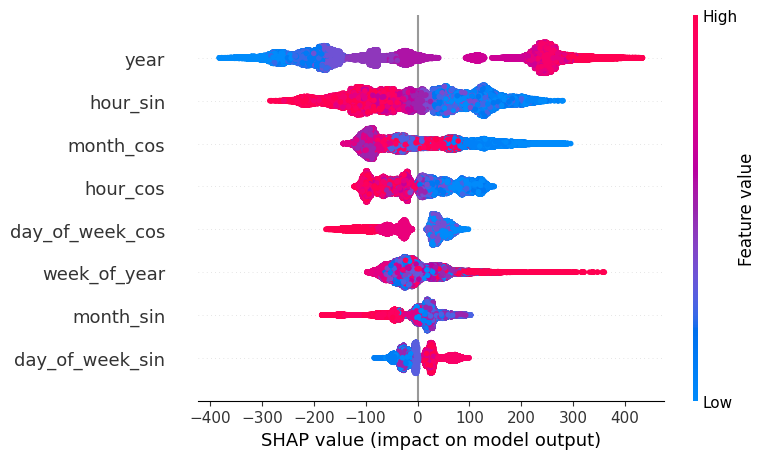

In [122]:
shap.summary_plot(shap_values, X_train)

In [123]:
# shap.dependence_plot('year', shap_values, X_train, interaction_index='hour_sin')


In [124]:
future_df

,datetime
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00
...,...
17539,2020-12-31 19:00:00
17540,2020-12-31 20:00:00
17541,2020-12-31 21:00:00
17542,2020-12-31 22:00:00


In [125]:
# Extract feature
future_dates_df = extract_date_features(future_df)  # Ensure features are added for training
future_dates_df

,datetime,year,week_of_year,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos
0,2019-01-01 00:00:00,2019,1,5.000000e-01,0.866025,0.781831,0.623490,0.000000,1.000000
1,2019-01-01 01:00:00,2019,1,5.000000e-01,0.866025,0.781831,0.623490,0.258819,0.965926
2,2019-01-01 02:00:00,2019,1,5.000000e-01,0.866025,0.781831,0.623490,0.500000,0.866025
3,2019-01-01 03:00:00,2019,1,5.000000e-01,0.866025,0.781831,0.623490,0.707107,0.707107
4,2019-01-01 04:00:00,2019,1,5.000000e-01,0.866025,0.781831,0.623490,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...
17539,2020-12-31 19:00:00,2020,53,-2.449294e-16,1.000000,0.433884,-0.900969,-0.965926,0.258819
17540,2020-12-31 20:00:00,2020,53,-2.449294e-16,1.000000,0.433884,-0.900969,-0.866025,0.500000
17541,2020-12-31 21:00:00,2020,53,-2.449294e-16,1.000000,0.433884,-0.900969,-0.707107,0.707107
17542,2020-12-31 22:00:00,2020,53,-2.449294e-16,1.000000,0.433884,-0.900969,-0.500000,0.866025


In [126]:
X_future = future_dates_df[feature_cols]
X_future

,year,hour_sin,hour_cos,day_of_week_cos,month_cos,day_of_week_sin,month_sin,week_of_year
0,2019,0.000000,1.000000,0.623490,0.866025,0.781831,5.000000e-01,1
1,2019,0.258819,0.965926,0.623490,0.866025,0.781831,5.000000e-01,1
2,2019,0.500000,0.866025,0.623490,0.866025,0.781831,5.000000e-01,1
3,2019,0.707107,0.707107,0.623490,0.866025,0.781831,5.000000e-01,1
4,2019,0.866025,0.500000,0.623490,0.866025,0.781831,5.000000e-01,1
...,...,...,...,...,...,...,...,...
17539,2020,-0.965926,0.258819,-0.900969,1.000000,0.433884,-2.449294e-16,53
17540,2020,-0.866025,0.500000,-0.900969,1.000000,0.433884,-2.449294e-16,53
17541,2020,-0.707107,0.707107,-0.900969,1.000000,0.433884,-2.449294e-16,53
17542,2020,-0.500000,0.866025,-0.900969,1.000000,0.433884,-2.449294e-16,53


In [127]:
# Concatenate datetime columns from both dataframes
full_date_feature_df = pd.concat([X_train, X_test, X_future], axis=0)

# # Set column name to 'datetime'
full_date_feature_df = full_date_feature_df.reset_index(drop=True)  # Optionally reset index if you want it to be sequential

full_date_feature_df

,year,hour_sin,hour_cos,day_of_week_cos,month_cos,day_of_week_sin,month_sin,week_of_year
0,2008,0.000000,1.000000,-0.222521,6.123234e-17,-0.974928,1.000000e+00,9
1,2008,0.258819,0.965926,-0.222521,6.123234e-17,-0.974928,1.000000e+00,9
2,2008,0.500000,0.866025,-0.222521,6.123234e-17,-0.974928,1.000000e+00,9
3,2008,0.707107,0.707107,-0.222521,6.123234e-17,-0.974928,1.000000e+00,9
4,2008,0.866025,0.500000,-0.222521,6.123234e-17,-0.974928,1.000000e+00,9
...,...,...,...,...,...,...,...,...
112531,2020,-0.965926,0.258819,-0.900969,1.000000e+00,0.433884,-2.449294e-16,53
112532,2020,-0.866025,0.500000,-0.900969,1.000000e+00,0.433884,-2.449294e-16,53
112533,2020,-0.707107,0.707107,-0.900969,1.000000e+00,0.433884,-2.449294e-16,53
112534,2020,-0.500000,0.866025,-0.900969,1.000000e+00,0.433884,-2.449294e-16,53


In [128]:
y_pred = best_model.predict(full_date_feature_df)

In [129]:
y_pred

array([1179.17286078, 1099.50522474, 1055.59194617, ..., 2450.89331522,
       2412.61420612, 2223.25814279])

In [130]:
# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['energy'])

# Display the DataFrame
y_pred_df

,energy
0,1179.172861
1,1099.505225
2,1055.591946
3,1052.921591
4,1052.921591
...,...
112531,2547.552730
112532,2498.776045
112533,2450.893315
112534,2412.614206


In [131]:
y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112536 entries, 0 to 112535
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   energy  112536 non-null  float64
dtypes: float64(1)
memory usage: 879.3 KB


In [132]:
# Concatenate datetime columns from both dataframes
full_date_df = pd.concat([df['datetime'], future_dates_df['datetime']], axis=0)

# # Set column name to 'datetime'
full_date_df = full_date_df.reset_index(drop=True)  # Optionally reset index if you want it to be sequential

full_date_df

,datetime
0,2008-03-01 00:00:00
1,2008-03-01 01:00:00
2,2008-03-01 02:00:00
3,2008-03-01 03:00:00
4,2008-03-01 04:00:00
...,...
112531,2020-12-31 19:00:00
112532,2020-12-31 20:00:00
112533,2020-12-31 21:00:00
112534,2020-12-31 22:00:00


In [133]:
full_date_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 112536 entries, 0 to 112535
Series name: datetime
Non-Null Count   Dtype         
--------------   -----         
112536 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 879.3 KB


In [134]:
df

,datetime,energy,year,week_of_year,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,is_iqr_outlier,is_z_outlier
0,2008-03-01 00:00:00,1259.985563,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.000000,1.000000,0,0
1,2008-03-01 01:00:00,1095.541500,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.258819,0.965926,0,0
2,2008-03-01 02:00:00,1056.247500,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.500000,0.866025,0,0
3,2008-03-01 03:00:00,1034.742000,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.707107,0.707107,0,0
4,2008-03-01 04:00:00,1026.334500,2008,9,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.866025,0.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
94987,2018-12-31 19:00:00,2528.446800,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.965926,0.258819,0,0
94988,2018-12-31 20:00:00,2461.883600,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.866025,0.500000,0,0
94989,2018-12-31 21:00:00,2365.994400,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.707107,0.707107,0,0
94990,2018-12-31 22:00:00,2342.942800,2018,1,-2.449294e-16,1.000000e+00,0.000000,1.000000,-0.500000,0.866025,0,0


In [135]:
pred_df = pd.concat([full_date_df, y_pred_df], axis=1)
pred_df

,datetime,energy
0,2008-03-01 00:00:00,1179.172861
1,2008-03-01 01:00:00,1099.505225
2,2008-03-01 02:00:00,1055.591946
3,2008-03-01 03:00:00,1052.921591
4,2008-03-01 04:00:00,1052.921591
...,...,...
112531,2020-12-31 19:00:00,2547.552730
112532,2020-12-31 20:00:00,2498.776045
112533,2020-12-31 21:00:00,2450.893315
112534,2020-12-31 22:00:00,2412.614206


In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Set 'datetime' as the index for both DataFrames
df.set_index('datetime', inplace=True)
pred_df.set_index('datetime', inplace=True)

In [137]:

# Resample the data by month, summing the energy values
df_monthly = df['energy' ].resample('ME').sum()
pred_df_monthly = pred_df.resample('ME').sum()

In [138]:
df_monthly

,energy
datetime,
2008-03-31,9.183090e+05
2008-04-30,9.448613e+05
2008-05-31,1.102027e+06
2008-06-30,1.085670e+06
2008-07-31,1.093714e+06
...,...
2018-08-31,1.521278e+06
2018-09-30,1.279884e+06
2018-10-31,1.400717e+06


In [139]:
pred_df_monthly

,energy
datetime,
2008-03-31,9.155297e+05
2008-04-30,9.573810e+05
2008-05-31,1.086382e+06
2008-06-30,1.085965e+06
2008-07-31,1.113399e+06
...,...
2020-08-31,1.484858e+06
2020-09-30,1.269102e+06
2020-10-31,1.344781e+06


In [140]:
# Combine the two DataFrames on their indices (which is now 'datetime')
merged = pd.concat([df_monthly, pred_df_monthly], axis=1, keys=['Actual', 'Predicted'])

In [141]:

merged

,Actual,Predicted
,energy,energy
datetime,,
2008-03-31,9.183090e+05,9.155297e+05
2008-04-30,9.448613e+05,9.573810e+05
2008-05-31,1.102027e+06,1.086382e+06
2008-06-30,1.085670e+06,1.085965e+06
2008-07-31,1.093714e+06,1.113399e+06
...,...,...
2020-08-31,NaN,1.484858e+06
2020-09-30,NaN,1.269102e+06


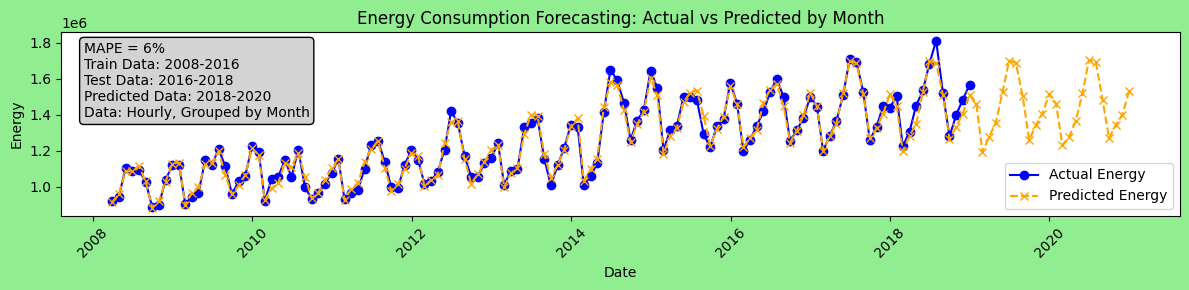

In [163]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 3))
plt.plot(merged.index, merged[('Actual', 'energy')], label='Actual Energy', color='blue', marker='o')
plt.plot(merged.index, merged[('Predicted', 'energy')], label='Predicted Energy', color='orange', linestyle='--', marker='x')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Energy')
plt.title('Energy Consumption Forecasting: Actual vs Predicted by Month')

# Show legend
plt.legend(loc='lower right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the background color to light green
plt.gcf().set_facecolor('lightgreen')

# Add text for train-test split and data ranges
info_text = (
    "MAPE = 6%\n"
    "Train Data: 2008-2016\n"
    "Test Data: 2016-2018\n"
    "Predicted Data: 2018-2020\n"
    "Data: Hourly, Grouped by Month"
)
plt.text(0.02, 0.95, info_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey'))

# Display the plot
plt.tight_layout()
plt.show()


In [143]:

# Analyze the trials data
trials_df = study.trials_dataframe()
trials_df

,number,value,datetime_start,datetime_complete,duration,params_bagging_temperature,params_bootstrap,params_border_count,params_colsample_bytree,params_depth,...,params_max_depth,params_min_child_samples,params_min_samples_leaf,params_min_samples_split,params_n_estimators,params_num_leaves,params_random_strength,params_regressor,params_subsample,state
0,0,0.065426,2024-12-25 05:37:05.770100,2024-12-25 05:37:07.509632,0 days 00:00:01.739532,NaN,NaN,NaN,0.605908,NaN,...,5.0,NaN,NaN,NaN,234.0,NaN,NaN,XGBoost,0.573010,COMPLETE
1,1,0.068450,2024-12-25 05:37:05.772809,2024-12-25 05:37:26.227812,0 days 00:00:20.455003,0.478898,NaN,156.0,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.364785,CatBoost,NaN,COMPLETE
2,2,0.071042,2024-12-25 05:37:07.515176,2024-12-25 05:37:41.866415,0 days 00:00:34.351239,NaN,False,NaN,NaN,NaN,...,11.0,NaN,8.0,6.0,133.0,NaN,NaN,RandomForest,NaN,COMPLETE
3,3,0.075104,2024-12-25 05:37:26.235143,2024-12-25 05:37:54.578552,0 days 00:00:28.343409,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,10.0,2.0,128.0,NaN,NaN,GradientBoosting,NaN,COMPLETE
4,4,0.075878,2024-12-25 05:37:41.872563,2024-12-25 05:37:43.635198,0 days 00:00:01.762635,NaN,NaN,NaN,0.730933,NaN,...,11.0,NaN,NaN,NaN,97.0,NaN,NaN,XGBoost,0.645248,COMPLETE
5,5,0.071444,2024-12-25 05:37:43.646618,2024-12-25 05:38:20.471920,0 days 00:00:36.825302,NaN,False,NaN,NaN,NaN,...,10.0,NaN,5.0,10.0,173.0,NaN,NaN,RandomForest,NaN,COMPLETE
6,6,0.067359,2024-12-25 05:37:54.587763,2024-12-25 05:38:02.137551,0 days 00:00:07.549788,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,4.0,5.0,58.0,NaN,NaN,GradientBoosting,NaN,COMPLETE
7,7,0.082860,2024-12-25 05:38:02.142838,2024-12-25 05:38:24.423491,0 days 00:00:22.280653,NaN,True,NaN,NaN,NaN,...,5.0,NaN,1.0,10.0,269.0,NaN,NaN,RandomForest,NaN,COMPLETE
8,8,0.073310,2024-12-25 05:38:20.478355,2024-12-25 05:38:21.731528,0 days 00:00:01.253173,NaN,NaN,NaN,0.505025,NaN,...,-1.0,18.0,NaN,NaN,160.0,35.0,NaN,LightGBM,0.587987,COMPLETE
9,9,0.074069,2024-12-25 05:38:21.740159,2024-12-25 05:38:22.980483,0 days 00:00:01.240324,NaN,NaN,NaN,0.815985,NaN,...,9.0,17.0,NaN,NaN,190.0,11.0,NaN,LightGBM,0.596854,COMPLETE


In [144]:
# Count the number of times each regressor was chosen
study.trials_dataframe()['params_regressor'].value_counts()

,count
params_regressor,
GradientBoosting,10
XGBoost,6
RandomForest,4
LightGBM,3
CatBoost,2


In [145]:
# Calculate the mean negative MAPE for each regressor
mean_scores = trials_df.groupby('params_regressor')['value'].mean()
print(mean_scores.sort_values())

params_regressor
GradientBoosting    0.066210
XGBoost             0.071253
CatBoost            0.071414
LightGBM            0.072111
RandomForest        0.075542
Name: value, dtype: float64


Visualization

In [146]:
# For visualizations
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

In [147]:
# 1. Optimization History
plot_optimization_history(study).show()

In [148]:
# # 3. Slice Plot
# plot_slice(study).show()

In [149]:
# # 4. Contour Plot
# plot_contour(study).show()

In [150]:
# # 5. Hyperparameter Importance
# plot_param_importances(study).show()